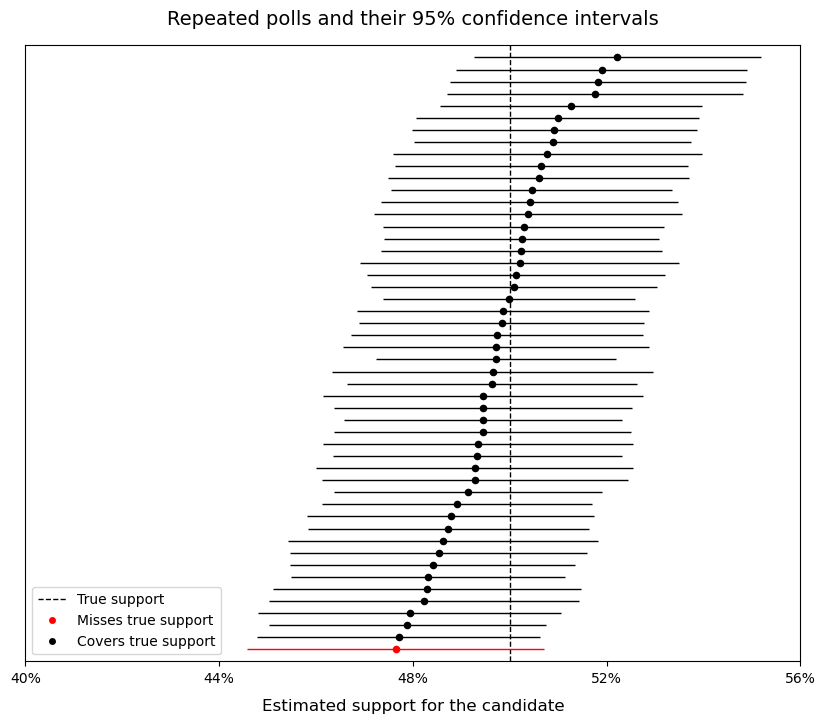

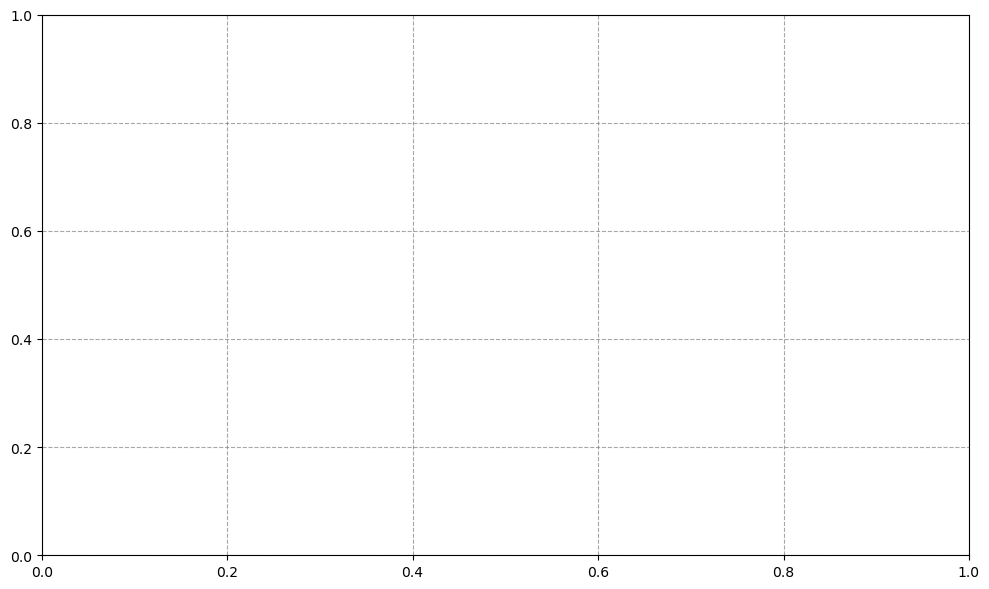

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# ===================== 1. 数据生成（模拟调查数据） =====================
np.random.seed(42)  # 固定随机种子，保证结果可复现
true_support = 50   # 真实支持率（对应图中垂直虚线位置）
n_polls = 50        # 模拟50次重复调查

# 生成估计值（按从小到大排序，匹配原图“下低上高”的视觉效果）
estimates = np.sort(np.random.normal(loc=true_support, scale=1.2, size=n_polls))
# 生成95%置信区间宽度（轻微随机波动，模拟真实抽样误差）
ci_width = np.random.normal(loc=3.0, scale=0.2, size=n_polls)
ci_lower = estimates - ci_width  # 置信区间下限
ci_upper = estimates + ci_width  # 置信区间上限

# 标记是否覆盖真实值（仅让最下方1个调查“未覆盖”，匹配原图红色仅1个的特征）
covers_true = (ci_lower <= true_support) & (ci_upper >= true_support)
covers_true[0] = False  # 强制第一个（最下方）调查为“未覆盖”

# ===================== 2. 绘图配置 =====================
fig, ax = plt.subplots(figsize=(10, 8))  # 画布尺寸匹配原图比例

# 绘制每个调查的置信区间（水平线）和估计值（散点）
y_positions = np.arange(n_polls)  # y轴位置（仅作为调查序号，无实际意义）
for i in range(n_polls):
    # 绘制置信区间水平线
    line_color = 'black' if covers_true[i] else 'red'
    ax.hlines(
        y=y_positions[i], xmin=ci_lower[i], xmax=ci_upper[i],
        color=line_color, linewidth=1, zorder=2
    )
    # 绘制估计值散点（zorder让点在水平线之上）
    ax.scatter(
        x=estimates[i], y=y_positions[i],
        color=line_color, s=20, zorder=3
    )

# 绘制真实支持率的垂直虚线
ax.axvline(x=true_support, color='black', linestyle='--', linewidth=1, zorder=1)

# ===================== 3. 样式调整（匹配原图视觉） =====================
# 坐标轴范围与刻度
ax.set_xlim(40, 56)          # x轴范围（40% ~ 56%）
ax.set_ylim(-1, n_polls)     # y轴留边距，避免图形贴边
ax.set_xticks(np.arange(40, 57, 4))  # x轴刻度间隔2%
ax.set_xticklabels([f'{x}%' for x in np.arange(40, 57, 4)])  # 刻度显示百分比

# 隐藏y轴（无实际含义，仅为调查序号）
ax.set_yticks([])            # 隐藏y轴刻度
ax.tick_params(axis='y', length=0)  # 隐藏y轴刻度线

# 标签与标题
ax.set_xlabel('Estimated support for the candidate', fontsize=12, labelpad=10)
ax.set_title('Repeated polls and their 95% confidence intervals', fontsize=14, pad=15)

# 自定义图例（匹配原图图例说明）
legend_elements = [
    Line2D([0], [0], color='black', linestyle='--', linewidth=1, label='True support'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=6, label='Misses true support'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=6, label='Covers true support')
]
ax.legend(handles=legend_elements, loc='lower left', fontsize=10)

plt.figure(figsize=(10, 6))
plt.grid(
    True,                # 开启网格
    linestyle='--',      # 网格线样式（虚线）
    alpha=0.7,           # 透明度（避免遮挡）
    color='gray',        # 网格线颜色
    linewidth=0.8        # 网格线宽度
)
# 调整布局，避免元素重叠
plt.tight_layout()

# 保存/显示图表（可替换为自己的保存路径）
# plt.savefig('polls_confidence_intervals.png', dpi=300, bbox_inches='tight')
plt.show()